# TUGAS 2 PRAKTIKUM ML C1
Rizal Adiyanto Nugroho

24060122140156

## 1. CLUSTERING DATASET

In [ ]:
import sys
sys.version
import pandas as pd
import numpy as np
%matplotlib inline
from copy import deepcopy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print(dataset.shape)
(3000, 2)
print(dataset.head(20))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

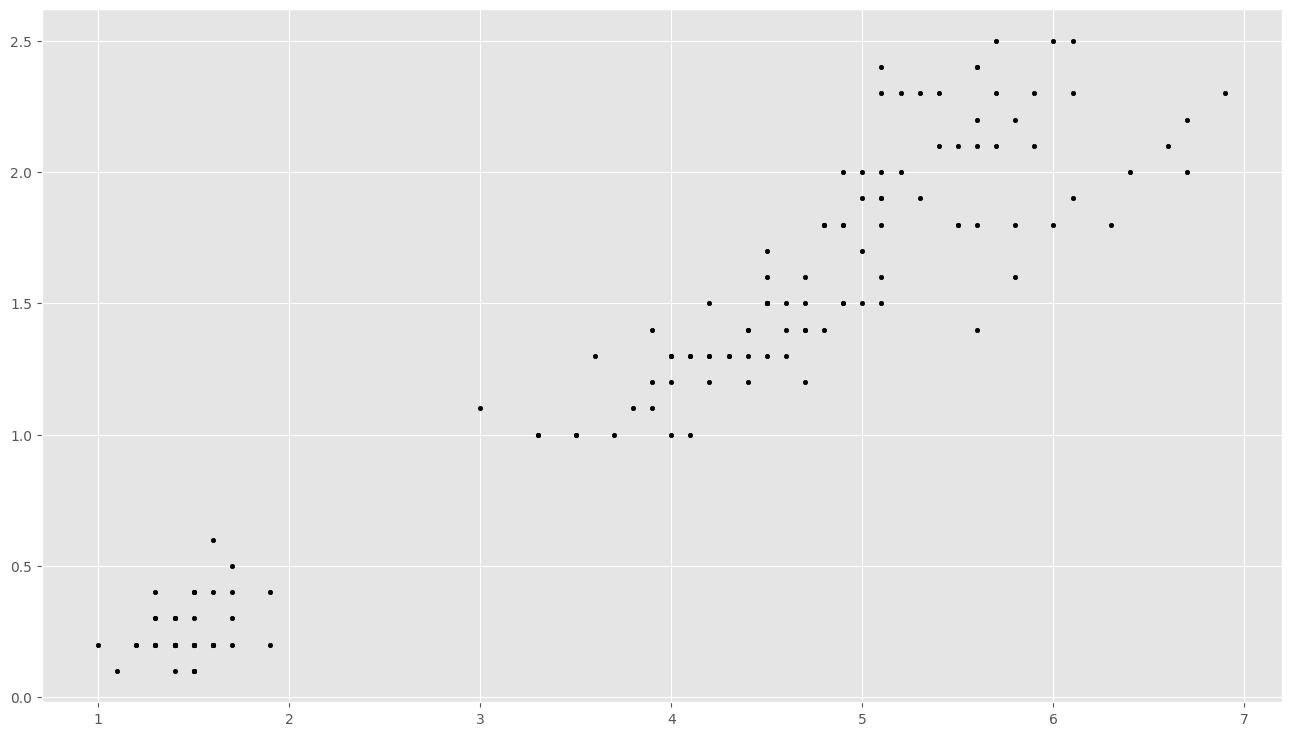

In [ ]:
f1 = dataset['petal-length'].values
f2 = dataset['petal-width'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

In [ ]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)
# Menampilkan cluster
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]


Kode diatas berfungsi untuk menampilkan hasil koordinat centroid berdasarkan cluster yang telah didefinisikan, hasil menunjukkan nilai rata-rata dari fitur dataset.

Dapat dilihat pada hasil, kluster pertama memiliki centroid di koordinat (5.59583333, 2.0375), kluster kedua di (1.464, 0.244), dan kluster ketiga di (4.26923077, 1.34230769)

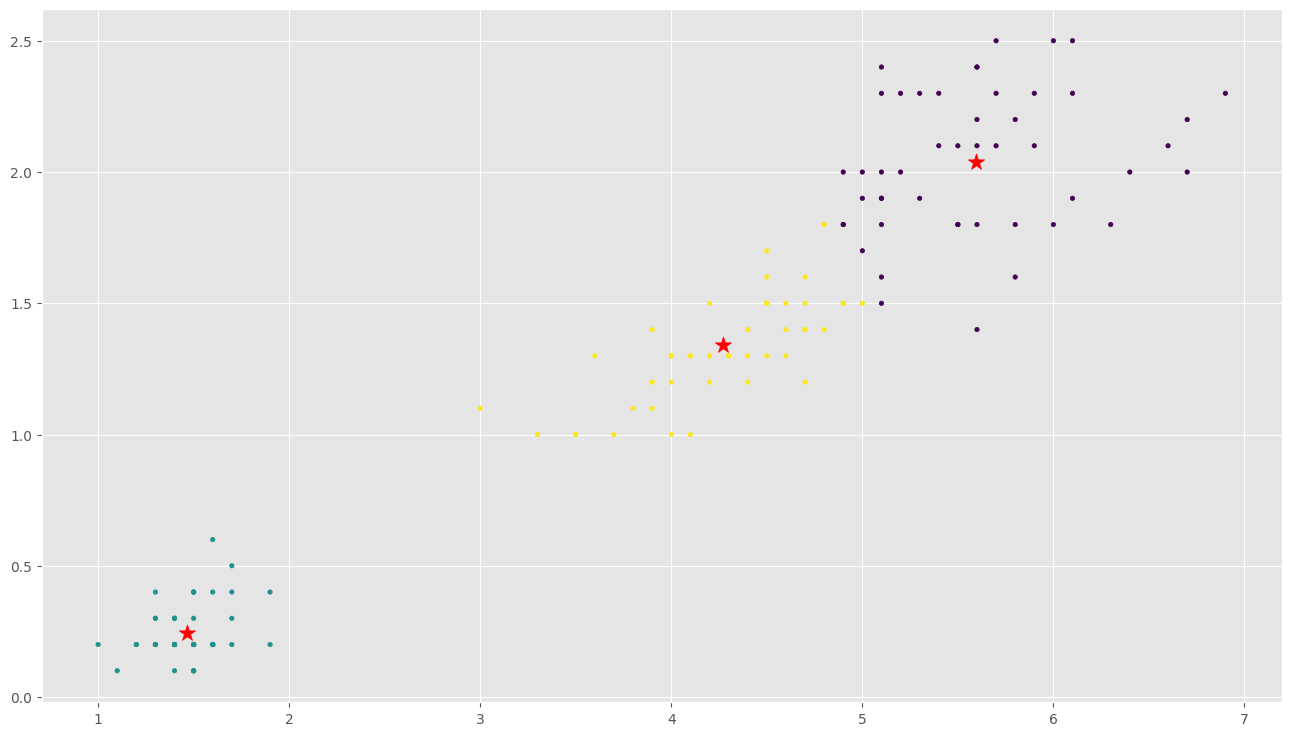

In [ ]:
plt.scatter (X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=150)

Code ini akan menggambarkan proses clustering menggunakan algoritme K-Means, di mana data dalam dataset dikelompokkan ke dalam tiga kluster berdasarkan fitur petal-length (sumbu x) dan petal-width (sumbu y). Titik-titik kecil berwarna (biru, kuning, dan ungu) mewakili data yang telah dikelompokkan sesuai dengan kluster masing-masing, sementara tanda bintang merah menunjukkan posisi centroid atau pusat dari setiap kluster. Pola yang didapat menunjukkan bahwa data berhasil dikelompokkan berdasarkan kemiripan fitur, dengan centroid yang mencerminkan titik tengah dari anggota kluster.

## 2. EVALUASI HASIL CLUSTERING MENGGUNAKAN SSE DAN SILHOUETTE COEFFICIENT

### a. Menggunakan SSE

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, [2, 3]]
for k in range (1, 10):
  # Menentukan Jumlah Cluster
  kmeans = KMeans(n_clusters=k, random_state = 1)
  # Fitting Input Data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sample dengan cluster centroid-nya(SSE)
  interia = kmeans.inertia_
  print ("k:",k, "const:", interia)

k: 1 const: 550.8953333333333
k: 2 const: 86.39021984551391
k: 3 const: 31.371358974358966
k: 4 const: 19.503256907603898
k: 5 const: 16.46923244932984
k: 6 const: 11.883567653148212
k: 7 const: 9.308601966873704
k: 8 const: 8.589204182085307
k: 9 const: 6.68705643390426


Code ini digunakan untuk mengelompokkan data iris berdasarkan fitur tertentu dengan jumlah kluster yang bervariasi dari 1 hingga 9. Hasil yang ditampilkan adalah nilai inertia atau jumlah kuadrat jarak (SSE) antara setiap sampel dalam dataset dengan centroid kluster terdekatnya untuk setiap jumlah kluster. Nilai inertia menurun seiring bertambahnya jumlah kluster, karena data dikelompokkan ke dalam lebih banyak kluster, sehingga setiap kluster lebih mendekati anggotanya. Namun, penurunan tersebut cenderung melambat setelah titik tertentu, yang dikenal sebagai elbow point. Dalam konteks ini, nilai inertia yang tinggi pada kluster kecil, seperti 550.89 untuk 1 kluster, menunjukkan bahwa data belum dikelompokkan dengan baik. Sebaliknya, nilai yang lebih rendah, seperti 6.68 untuk 9 kluster, menunjukkan bahwa kluster-kluster lebih sesuai dengan data.

### b. Menggunakan Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, [2, 3]]
silhouette_score(X, labels)

0.4394054801735338

Hasil evaluasi menunjukkan nilai Silhouette Coefficient sebesar 0.439, nilai ini menunjukkan klustering yang cukup baik, tetapi masih ada beberapa titik data yang kurang jelas keterkaitannya dengan klusternya, atau data mungkin memerlukan jumlah kluster yang lebih optimal untuk hasil yang lebih baik.

## 3. PENENTUAN JUMLAH K DENGAN ELBOW METHOD

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.cluster import KMeans

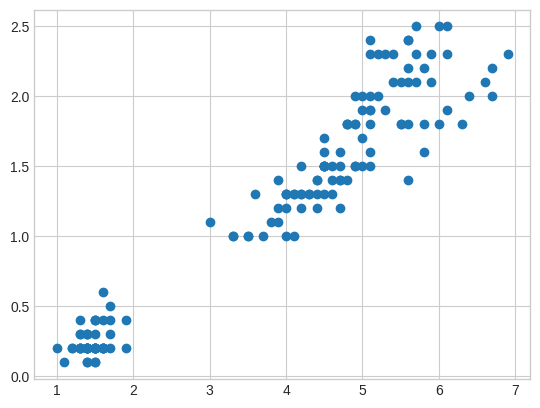

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.plot()
plt.scatter(features[2], features[3])
plt.show()

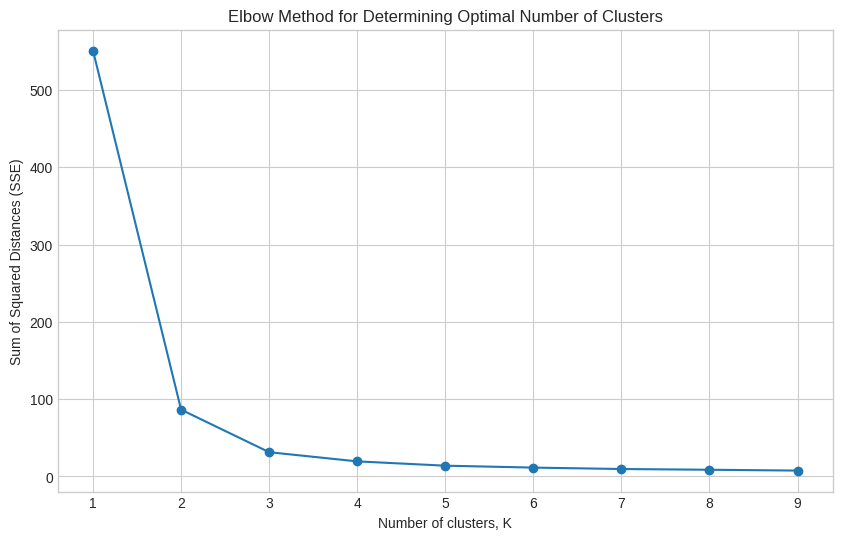

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Selecting Petal Length and Petal Width

SSE = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    SSE.append(km.inertia_)

# Plotting the SSE to see the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, SSE, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters, K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(list(K))
plt.grid(True)
plt.show()

Grafik ini menunjukkan hasil dari metode Elbow Method, yang digunakan untuk menentukan jumlah kluster optimal dalam algoritme K-Means. Pada grafik, sumbu x merepresentasikan jumlah kluster (K), sedangkan sumbu y menunjukkan nilai Sum of Squared Distances (SSE), yaitu jumlah kuadrat jarak antara setiap titik data dengan centroid klusternya.

Berdasarkan grafik, jumlah kluster optimal untuk dataset ini adalah 3, karena pada titik tersebut klustering cukup efektif dalam mengurangi jarak antar data dan centroid tanpa menambah jumlah kluster secara berlebihan.

## 4. PLOT HASIL CLUSTER DENGAN NILAI K OPTIMAL

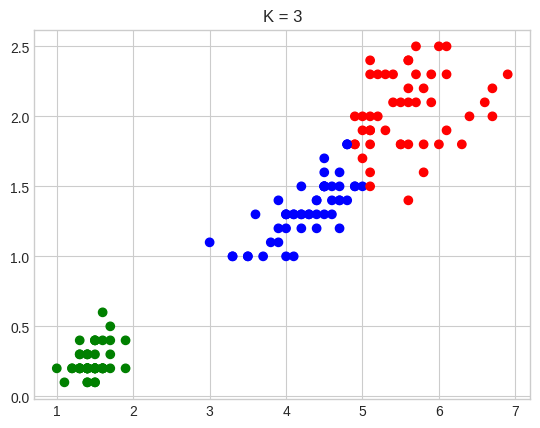

In [4]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[2], features[3], c=label_color)
plt.title('K = 3')
plt.show()

Berdasarkan K yang telah dihitung sebelumnya meggunakan elbow method, dan didapatkan K = 3. Dilakukan peng klasifikasian sampel Iris kedalam 3 cluster dengan warna Merah, Biru, dan Hijau.

Berdasarkan hasil grafik, algoritma K-Means berhasil mengelompokkan data menjadi tiga kelompok yang sesuai dengan pola distribusi fitur dalam dataset